# 도출 Insight
## 1. 코로나 확진자 증가 추이에 따라서 검색량은 이와 비례하게 증가할 것이다. 이에 따라 사람들은 경각심을 느낄 것이기에, 유동인구수는 줄어들 것이다.

## 2. 이동한 경로가 많은 나잇대의 그룹이 다른 그룹에 코로나를 더 많이 전파시켰을 것이다.

### 1. 코로나 확진자 증가 추이에 따라서 검색량은 이와 비례하게 증가할 것이다. 이에 따라 사람들은 경각심을 느낄 것이기에, 유동인구수는 줄어들 것이다.

In [767]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import json
import ast
import pydeck as pdk
import ipywidgets as widgets

In [768]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [769]:
import warnings  
warnings.filterwarnings('ignore')

In [770]:
info = pd.read_csv(r'.\data\PatientInfo.csv')
route = pd.read_csv(r'.\data\PatientRoute.csv')
time = pd.read_csv(r'.\data\Time.csv')

In [771]:
#환자 정보 csv 내 나이 데이터에 관한 결측치 갯수 조사.
info.age.isnull().sum()

479

In [772]:
#환자 정보 나이가 '10s' 형식으로 저장되어 있기 때문에 's'를 없애줌.
info.age = info.age.str.replace('s','',regex=True)

In [773]:
#환자 정보 나이를 int형으로 변환하여줌.
info.age=pd.to_numeric(info.age)

In [774]:
#환자 정보 생년월일을 공백은 NaN, 채워져있는 곳은 int형으로 변환하여줌.
for i in range(len(info)):
    if info.birth_year[i]==" ":
        info.birth_year[i]=np.NaN
    else:
        info.birth_year[i]=pd.to_numeric(info.birth_year[i])

In [775]:
#환자 정보 내에서 나이는 결측치로 채워져있고, 생년월일의 값은 존재할 때, 이를 이용해서 나이 데이터를 보충해줌.
for i in range(len(info)):
    if pd.notna(info.birth_year[i]) and pd.isna(info.age[i]):
        info.age[i]=(2020-info.birth_year[i])//10*10

In [776]:
#140개의 데이터가 보충되었음을 관측 가능.
info.age.isnull().sum()

339

In [777]:
#나이 데이터를 활용할 것이기 때문에 결측값은 삭제해주도록 함.
info.dropna(subset=['age'], inplace=True)

In [778]:
#datetime 형식으로 값을 변환해줌.
def convertdate(x):
    x=datetime.strptime(x, '%Y-%m-%d')
    return x

In [779]:
#경로 데이터의 date 값을 datetime 형식으로 변환해준다.
route.date = route.date.apply(lambda x : convertdate(x))

In [780]:
#검색 기간 설정을 위하여 route의 데이터가 몇 일자부터 몇 일자까지 있는지 알아본다.
print(max(route.date), min(route.date))

2020-06-01 00:00:00 2020-01-20 00:00:00


In [781]:
#네이버 datalab API를 활용하여 구간별 검색량 상대적 비율을 얻어온다.
#검색 키워드 : 코로나, 코로나 바이러스, 코로나 확진자, 코로나 연장, 코로나 브리핑, 코로나 증상, 코로나19, 우한 폐렴, 우한, 우한폐렴, 우한 코로나
#나이 구간 설정 : 0대[0~12], 10대[13~18], 20대[19~29], 30대[30~39], 40대[40~49], 50대[50~59], 60대 이상
import os
import sys
import urllib.request
client_id = "o8ZrYHHaKoOyyhgO8hIy"
client_secret = "VIndT0Qa0J"
url = "https://openapi.naver.com/v1/datalab/search";
body_0 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"1\"],\"gender\":\"\"}";
body_10 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"2\"],\"gender\":\"\"}";
body_20 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"3\",\"4\"],\"gender\":\"\"}";
body_30 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"5\",\"6\"],\"gender\":\"\"}";
body_40 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"7\",\"8\"],\"gender\":\"\"}";
body_50 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"9\",\"10\"],\"gender\":\"\"}";
body_60 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"11\"],\"gender\":\"\"}";
body = [body_0, body_10, body_20, body_30, body_40, body_50, body_60]

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response= []
rescode = []
response_body=[]
#검색량 비율 data array 저장
search_ratio=[]
for i in body:
    response.append(urllib.request.urlopen(request, data=i.encode("utf-8")))
for i in response:
    rescode.append(i.getcode())
for i in range(len(rescode)):
    if(rescode[i]==200):
        response_body = response[i].read()
    #     print(response_body.decode('utf-8'))
    #     print(response_body)
        response_body=ast.literal_eval(response_body.decode('utf-8'))
#         print(response_body['results'][0]['data'][1]['ratio'])
        result=[]
        for j in range(len(response_body['results'][0]['data'])):
            result.append(response_body['results'][0]['data'][j]['ratio'])
        search_ratio.append(result)
    else:
        print("Error Code:" + rescode)

In [782]:
#차트의 x값이 될 date를 변수로 저장.
base = datetime(2020,1,20)
date = [base + dt.timedelta(days=x) for x in range(134)]

In [783]:
#time의 date 데이터를 datetime 형식으로 변환.
time['date']=time['date'].apply(lambda x: convertdate(x))

In [784]:
#날짜에 따른 확진자 수만 따로 추출
confirmed_df= time[['date','confirmed']]
#확진자 수 변동 추이 계산
confirmed_diff = confirmed_df.confirmed.diff()

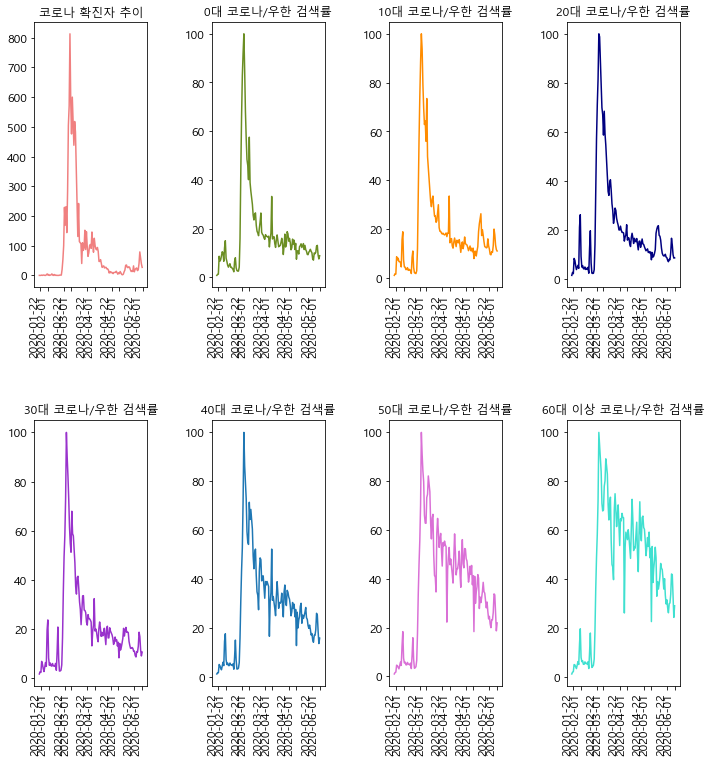

In [785]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

#차트 기본값 설정.
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.labelsize'] = 20.

fig, ((ax_confirmed, ax0, ax1,ax2), (ax3, ax4, ax5, ax6)) = plt.subplots(2,4, figsize=(10,10))

ax_confirmed.plot(confirmed_df.date, confirmed_diff, color='lightcoral')
ax_confirmed.set_title('코로나 확진자 추이')
ax0.plot(date, search_ratio[0], color='olivedrab')
ax0.set_title('0대 코로나/우한 검색률')
ax1.plot(date, search_ratio[1], color='darkorange')
ax1.set_title('10대 코로나/우한 검색률')
ax2.plot(date, search_ratio[2], color='navy')
ax2.set_title('20대 코로나/우한 검색률')
ax3.plot(date, search_ratio[3], color='darkorchid')
ax3.set_title('30대 코로나/우한 검색률')
ax4.plot(date, search_ratio[4])
ax4.set_title('40대 코로나/우한 검색률')
ax5.plot(date, search_ratio[5], color='orchid')
ax5.set_title('50대 코로나/우한 검색률')
ax6.plot(date, search_ratio[6], color='turquoise')
ax6.set_title('60대 이상 코로나/우한 검색률')

plt.tight_layout()
fig.subplots_adjust(hspace=.5)

ax_confirmed.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax0.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='right')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha='right')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90, ha='right')
ax5.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha='right')
ax6.set_xticklabels(ax4.get_xticklabels(), rotation=90, ha='right')

plt.show()

#코로나 확진자 추이 및 연령별 코로나 / 우한 검색률 시각화

### 코로나 확진자 추이에 따라 검색량이 굉장히 유사하게 변동한다는 것을 알 수 있다.

In [786]:
#1월부터 6월까지 서울 유동인구 데이터 불러오기
floating2001 = pd.read_csv(r'.\data\Floating_Population_2001.csv')
floating2002 = pd.read_csv(r'.\data\Floating_Population_2002.csv')
floating2003 = pd.read_csv(r'.\data\Floating_Population_2003.csv')
floating2004 = pd.read_csv(r'.\data\Floating_Population_2004.csv')
floating2005 = pd.read_csv(r'.\data\Floating_Population_2005.csv')
floating2006 = pd.read_csv(r'.\data\Floating_Population_2006.csv')

print(floating2001.shape, floating2002.shape)
print(floating2003.shape, floating2004.shape)
print(floating2005.shape, floating2006.shape)

(223200, 7) (208800, 7)
(216000, 7) (216000, 7)
(220800, 7) (216000, 7)


In [787]:
#유동인구 데이터 전부 합치기
floating = pd.concat([floating2001, floating2002, floating2003, floating2004, floating2005, floating2006])

In [788]:
#유동인구 칼럼을 영어로 변환. -> 혹시 모를 한글 호환에 관한 에러 방지
floating.columns=['date','hour','age','sex','province','city','fp_num']
#데이터 분석에 필요한 데이터만 추출
floating=floating.loc[:,['date','age','fp_num']]

In [789]:
#date와 age로 그룹화한 후, 총 유동인구 수의 평균을 구한다.
floating_group = floating.groupby(by=['date','age']).mean()

In [790]:
#index로 넘어간 date와 age를 다시 column으로 넘겨준다.
floating_group.reset_index(inplace=True)

In [791]:
#1월 20일 이전 자료와 6월 1일 이후 자료는 갖고 있는 데이터에 맞춰 삭제
floating_group = floating_group[(floating_group['date']>=20200120) & (floating_group['date']<=20200601)]

In [792]:
#date 데이터를 datetime 형식으로 변환
floating_group['date']=pd.to_datetime(floating_group['date'], format='%Y%m%d')

In [793]:
#20대, 30대, 40대, 50대, 60대, 70대의 유동 인구 수를 구할 수 있음을 얻음
floating_group.age.unique()

array([20, 30, 40, 50, 60, 70], dtype=int64)

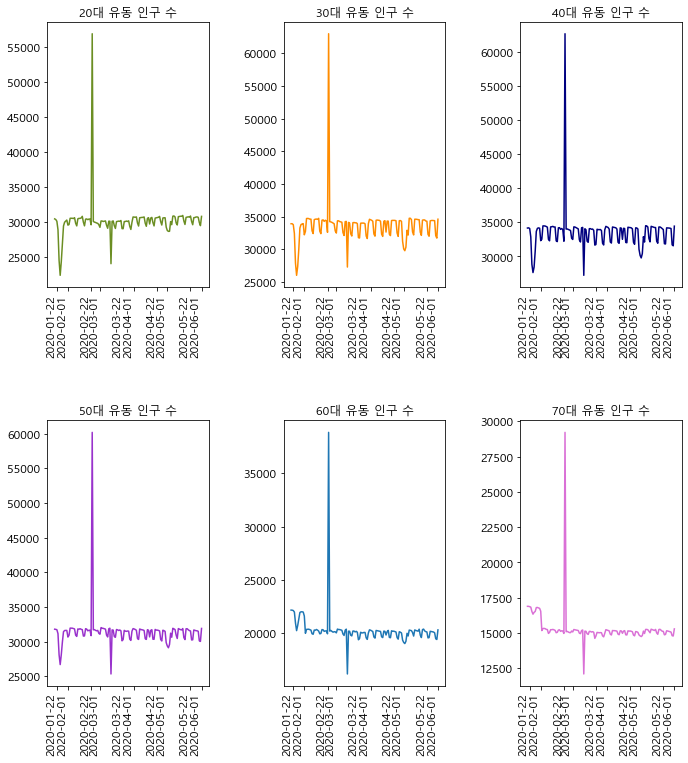

In [794]:
#차트 기본값 설정.
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.labelsize'] = 20.

fig, ((ax0, ax1,ax2), (ax3, ax4, ax5)) = plt.subplots(2,3, figsize=(10,10))

ax0.plot(floating_group[floating_group['age']==20].date, floating_group[floating_group['age']==20].fp_num, color='olivedrab')
ax0.set_title('20대 유동 인구 수')
ax1.plot(floating_group[floating_group['age']==30].date, floating_group[floating_group['age']==30].fp_num, color='darkorange')
ax1.set_title('30대 유동 인구 수')
ax2.plot(floating_group[floating_group['age']==40].date, floating_group[floating_group['age']==40].fp_num, color='navy')
ax2.set_title('40대 유동 인구 수')
ax3.plot(floating_group[floating_group['age']==50].date, floating_group[floating_group['age']==50].fp_num, color='darkorchid')
ax3.set_title('50대 유동 인구 수')
ax4.plot(floating_group[floating_group['age']==60].date, floating_group[floating_group['age']==60].fp_num)
ax4.set_title('60대 유동 인구 수')
ax5.plot(floating_group[floating_group['age']==70].date, floating_group[floating_group['age']==70].fp_num, color='orchid')
ax5.set_title('70대 유동 인구 수')

plt.tight_layout()
fig.subplots_adjust(hspace=.5)

ax_confirmed.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax0.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='right')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha='right')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90, ha='right')
ax5.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha='right')
plt.show()

#연령별 유동 인구 수 시각화

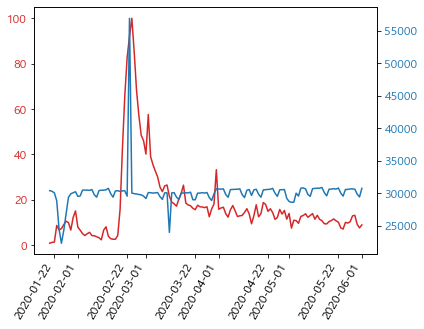

In [795]:
fig, ax1 = plt.subplots()

color='tab:red'
ax1.plot(date, search_ratio[0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color='tab:blue'
ax2.plot(floating_group[floating_group['age']==20].date, floating_group[floating_group['age']==20].fp_num, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

fig.subplots_adjust(hspace=.5)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='right')


plt.show()
#20대의 코로나/우한 폐렴 검색량과 유동인구수 비교

### 자료가 서울에서의 유동인구수를 조사해 놓은 터라 평일에는 직장에 근무하는 사람들 때문에라도 유동인구수가 줄어드는 추세를 보이지 않은 듯하다. 그러나 한 부분에서 검색이 한창 활발하던 때 유동 인구 수가 갑자기 줄어있는 부분을 확인할 수 있다.

### 알아보니 이러한 방식을 insight를 도출하려던 다른 그룹도 1월 23일자 데이터에 급격히 증가한 데이터를 이상치 데이터로 두고, 별도의 처리를 거쳤다. 데이터에 오류가 있는 듯 싶다. 23일은 보지 않는 것이 맞는 듯.

### 2. 이동한 경로가 많은 나잇대의 그룹이 다른 그룹에 코로나를 더 많이 전파시켰을 것이다.

In [797]:
#환자 경로와 정보 데이터에서 필요한 데이터만 추출
patient_lat_lon = route.loc[:,['patient_id','latitude','longitude']]
patient_age = info.loc[:,['patient_id', 'age']]

In [798]:
#두 데이터를 patient_id에 맞춰 join
patient_route = patient_lat_lon.merge(patient_age)

#나이 데이터를 float형으로 변환
# patient_route.age = patient_route.age.str.replace('s','',regex=True)
# patient_route.age=pd.to_numeric(patient_route.age)

#나이 데이터에서 나오는 값들 추출
patient_route.age.unique()

array([50., 30., 20., 60., 80., 70., 40., 10., 90.,  0.])

In [799]:
import folium


map_osm0 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm10 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm20 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm30 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm40 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm50 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm60 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm70 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm80 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm90 = folium.Map(location=[37.57, 127.01], zoom_start=5)

In [800]:
patient_id = ""

for item in patient_route.index:
    if patient_route.loc[item,'age']==0: 
        if patient_id == "":
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        elif patient_id == patient_route.loc[item, 'patient_id']:
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm0)
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
            
map_osm0

In [801]:
patient_id = ""

for item in patient_route.index:
    if patient_route.loc[item,'age']==10: 
        if patient_id == "":
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        elif patient_id == patient_route.loc[item, 'patient_id']:
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm10)
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
            
map_osm10

In [802]:
patient_id = ""

for item in patient_route.index:
    if patient_route.loc[item,'age']==20: 
        if patient_id == "":
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        elif patient_id == patient_route.loc[item, 'patient_id']:
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm20)
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
            
map_osm20

In [803]:
patient_id = ""

for item in patient_route.index:
    if patient_route.loc[item,'age']==30: 
        if patient_id == "":
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        elif patient_id == patient_route.loc[item, 'patient_id']:
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm30)
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
            
map_osm30

In [804]:
patient_id = ""

for item in patient_route.index:
    if patient_route.loc[item,'age']==40: 
        if patient_id == "":
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        elif patient_id == patient_route.loc[item, 'patient_id']:
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm40)
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
            
map_osm40

In [805]:
patient_id = ""

for item in patient_route.index:
    if patient_route.loc[item,'age']==50: 
        if patient_id == "":
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        elif patient_id == patient_route.loc[item, 'patient_id']:
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm50)
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
            
map_osm50

In [806]:
patient_id = ""

for item in patient_route.index:
    if patient_route.loc[item,'age']==60: 
        if patient_id == "":
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        elif patient_id == patient_route.loc[item, 'patient_id']:
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm60)
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
            
map_osm60

In [807]:
patient_id = ""

for item in patient_route.index:
    if patient_route.loc[item,'age']==70: 
        if patient_id == "":
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        elif patient_id == patient_route.loc[item, 'patient_id']:
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm70)
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
            
map_osm70

In [808]:
patient_id = ""

for item in patient_route.index:
    if patient_route.loc[item,'age']==80: 
        if patient_id == "":
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        elif patient_id == patient_route.loc[item, 'patient_id']:
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm80)
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
            
map_osm80

In [809]:
patient_id = ""

for item in patient_route.index:
    if patient_route.loc[item,'age']==90: 
        if patient_id == "":
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        elif patient_id == patient_route.loc[item, 'patient_id']:
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm90)
            point=[]
            patient_id=patient_route.loc[item, 'patient_id']
            lat=patient_route.loc[item,'latitude']
            long=patient_route.loc[item,'longitude']
            point.append([lat,long])
            
map_osm90

### 지도 상에 나타나는 모습으로만 보아도 20대부터 60대까지 이동이 가장 활발하다는 것을 확인할 수 있다. 그럼 다른 환자에게 코로나를 옮긴 환자들의 나잇대는 어떻게 분포되어 있을까? 이동이 가장 활발한 20대부터 60대가 가장 큰 분포를 이루고 있지 않을까?

In [810]:
#환자 정보 테이블에서 필요한 정보만 추출
patient_info = info.loc[:,['patient_id','age','infected_by','contact_number']]

#나이 데이터 값을 float 형으로 변환
# patient_info.age = patient_info.age.str.replace('s','',regex=True)
# patient_info.age=pd.to_numeric(patient_info.age)

#인덱스를 0부터 순서대로 다시 설정
patient_info = patient_info.reindex(range(len(patient_info)))

#contact_number 데이터 값을 flaot 형으로 변환 "-"일 시 np.nan으로 변환
for i in range(len(info)):
    if patient_info.contact_number[i]=="-":
        patient_info.contact_number[i]=np.nan
patient_info.contact_number=pd.to_numeric(patient_info.contact_number)

<BarContainer object of 11 artists>

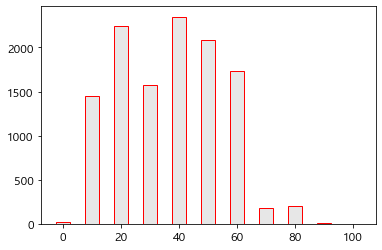

In [867]:
#나잇대별로 다른 사람들과 접촉한 횟수 합산
patient_agegroup = patient_info.loc[:,['age','contact_number']]
patient_agegroup = patient_agegroup.groupby(by='age').sum()

#이상치 삭제. -9980인 나이가 뜸.
patient_agegroup = patient_agegroup.iloc[1:,:]

#접촉 횟수 차트에 시각화
plt.bar(patient_agegroup.index, patient_agegroup.contact_number, width = 5, color=(0.1,0.1,0.1,0.1), edgecolor='red')

### 다른 사람들과 접촉한 수는 10대부터 60대까지가 다수 분포해 있음을 알 수 있다. 그 중 40대가 가장 다른 사람들과 접촉한 수가 많았음을 알 수 있다.

In [816]:
#누군가에게 감염된 여부가 나와있는지 명시되어 있는 데이터들을 추출
patient_infected_by = patient_info[patient_info['infected_by'].notnull()]

In [817]:
#id가 #으로 시작하여 존재하는 데이터와 대응이 안 되는 데이터들 삭제.
patient_infected_by=patient_infected_by[~patient_infected_by.infected_by.str.contains('#',na=False)]

#각 아이디마다 몇 명의사람을 감염시켰는 지 그룹화.
patient_infected_group = patient_infected_by.groupby('infected_by').count()

#index를 다시 column으로 배치
patient_infected_group.reset_index(inplace=True)

In [845]:
#필요한 데이터만 추출
patient_infected_group = patient_infected_group.iloc[:,:2]

#칼럼명 변경. 1번째 칼럼은 infected_by이다. 이를 누군갈 감염시킨 주체, patient_id로 나타내어 준다.
#2번째 칼럼이 patient id이지만 실제 데이터는 감염시킨 사람의 수를 나타낸다. count로 명명한다.
patient_infected_group.columns=['patient_id','counts']

In [849]:
#나이별 감염시킨 환자의 수를 나타낼 딕셔너리 정의
num_of_infected_patients_by_age = {0:0,10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0}

In [850]:
for i in range(len(patient_infected_group)):
    #공통된 환자 ID를 이용하여 나이를 얻어냄. 나이는 딕셔너리의 키 값과 일치함.
    get_id = int(patient_infected_group.patient_id[i])
    get_age = patient_info[patient_info['patient_id']==get_id].age
    #나이에 해당하는 딕셔너리 키의 value에 이전에 구해놓은 count를 더함.
    try:
        num_of_infected_patients_by_age[get_age.values[0]]+=patient_infected_group.counts[i]
    except IndexError:
        pass

<BarContainer object of 10 artists>

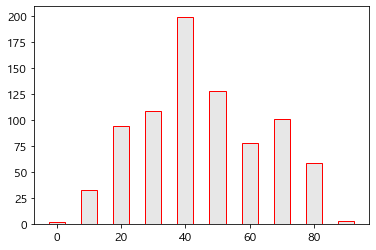

In [868]:
#나이별 코로나를 확진시킨 사람의 수 시각화
keys = num_of_infected_patients_by_age.keys()
values = num_of_infected_patients_by_age.values()
plt.bar(keys, values, width = 5, color=(0.1,0.1,0.1,0.1), edgecolor='red')

### 예상한 대로 가장 다른 사람과 접촉한 수가 많았던 40대가 다른 사람들에게 코로나를 가장 많이 옮겼다. 그러나 그 뒤를 잇던 20대는 의외로 다른 사람들에게 코로나를 다른 나잇대의 사람들에 비해서 많이 옮기지 않았음을 알 수 있다. 이를 통해 코로나는 다른 지역을 활발히 돌아다니는 것보다는 다른 요인에 의해 더 쉽게 전파될 수 있음을 알 수 있다. 그 다른 요인에는 사람들과의 밀집도와 마스크 착용 여부, 손소독제 사용 빈도, 손 세척 빈도 수 등이 있을 것이라 예상한다.